In [5]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
import scipy.sparse.linalg
from scipy.integrate import odeint

(-1.0, 1.0)

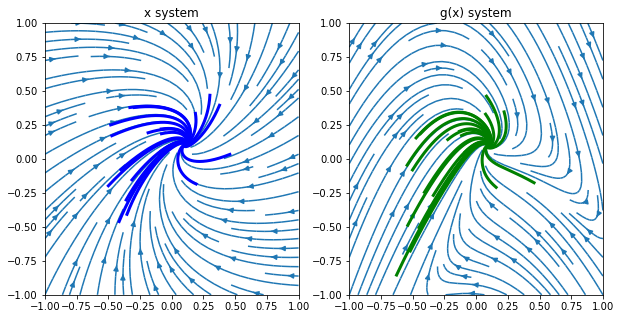

In [6]:
random_state = 1
np.random.seed(random_state)

A = np.matrix([[-2.0,1.0],[-1,-1]])

def g(x):
    return np.array([x[0]-x[1]**2, -x[0]**2+x[1]+2*x[0]*x[1]**2-x[1]**4])
def ginv(y):
    return np.array([y[0]+y[0]**4+2*y[0]**2*y[1]+y[1]**2, y[0]**2+y[1]])

def gradg(x):
    return np.array([
        [1, -2*x[0]+2*x[1]**2],
        [-2*x[1], 1+4*x[0]*x[1]-4*x[1]**3]
    ])

def f(x,params):
    y = x.copy()
    y[0] = y[0] - (params[0] + params[1])
    y[1] = y[1] - params[2]
    dy = (A @ y)
    return dy

def dyn_sys(y,t,params):
    return np.array(f(y,params),dtype=np.float).flatten()

def dyn_sys_y(y,t,params):
    gradfy = gradg(ginv(y))
    fy = f(ginv(y),params)
    dy = gradfy.T @ np.array(fy,dtype=np.float).flatten()
    return dy

param0 = [0,.1,.1]

xs = np.linspace(-1,1,50)
xx,yy = np.meshgrid(xs,xs)
pts = np.column_stack([xx.ravel(), yy.ravel()])

# compute vector field on x
v=np.zeros(pts.shape)
for k in range(v.shape[0]):
    v[k,:] = dyn_sys(pts[k,:].reshape(-1,), 0, param0).ravel()

vx = v[:,0].reshape(xx.shape)
vy = v[:,1].reshape(xx.shape)

# compute vector field on g(x)=y
vg=np.zeros(pts.shape)
for k in range(vg.shape[0]):
    vg[k,:] = dyn_sys_y(pts[k,:].reshape(-1,), 0, param0).ravel()

vgx = vg[:,0].reshape(xx.shape)
vgy = vg[:,1].reshape(xx.shape)

# plot vector fields and trajectories
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].streamplot(xx,yy,vx,vy)
ax[1].streamplot(xx,yy,vgx,vgy)

for n in range(20):
    y0 = (np.random.rand(2,)-.5)
    
    xt = odeint(lambda y,t: dyn_sys(y,t,param0), y0=y0, t=np.linspace(0,3,1000))
    yt = odeint(lambda y,t: dyn_sys_y(y,t,param0), y0=g(y0), t=np.linspace(0,3,1000))

    zt = np.zeros(xt.shape)
    for k in range(zt.shape[0]):
        zt[k,:] = g(xt[k,:])

    ax[0].plot(*xt.T,'b-',linewidth=3)
    ax[1].plot(*zt.T,'g-',linewidth=3)
    
xl,yl = [np.min(xs),np.max(xs)],[np.min(xs),np.max(xs)]
ax[0].set_ylim(yl)
ax[0].set_xlim(xl)
ax[0].set_title('x system')
ax[1].set_title('g(x) system')
ax[1].set_ylim(yl)
ax[1].set_xlim(xl)